In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random


Load the Data

In [2]:
df = pd.read_csv("students_data.csv")
df.head()

,YearofStudy,Course,Age,ApproxHeight,ApproxWeight,KCSE,Yr_JoinCampus,SitKCSE,Expense_Semester,Expense_Accommodation,Previous_Exam_MeanGrade
0,Second Year,MATHEMATICS,20,152,80,2016,2018,Central,8744,6043,B
1,First Year,ECONOMICS AND STATISTICS,29,182,79,2010,2010,Rift Valley,26293,14782,B
2,Fourth Year,MATHEMATICS,22,167,64,2015,2016,Western,44105,19224,B
3,Second Year,ECONOMICS AND STATISTICS,23,149,52,2016,2018,Coast,33954,18795,B
4,Second Year,MATHEMATICS,18,150,70,2013,2018,Western,18113,25569,A


# relation between the input variables with the target variable (Grade) 

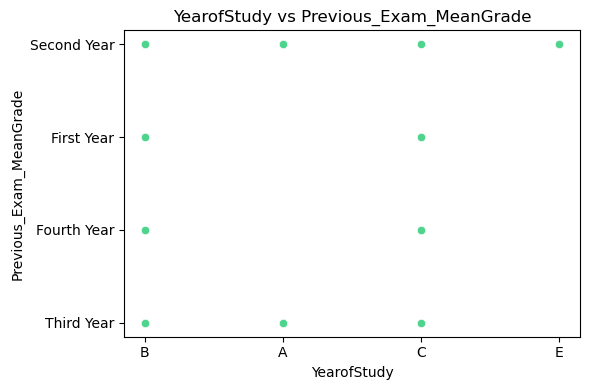

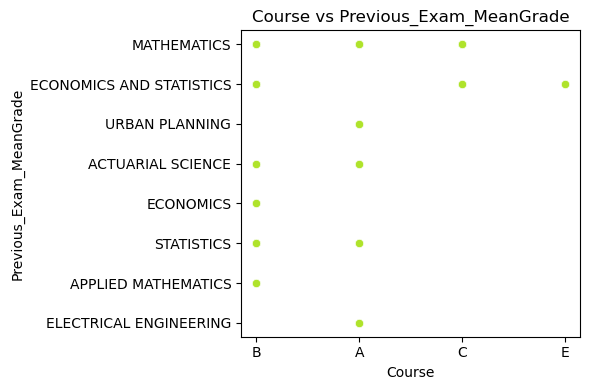

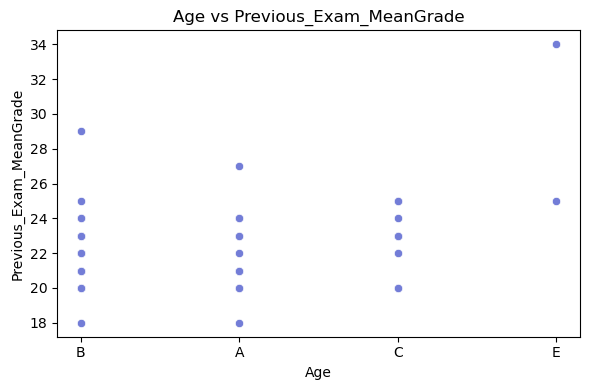

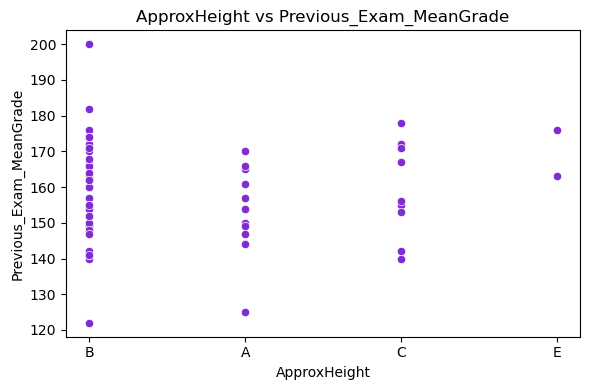

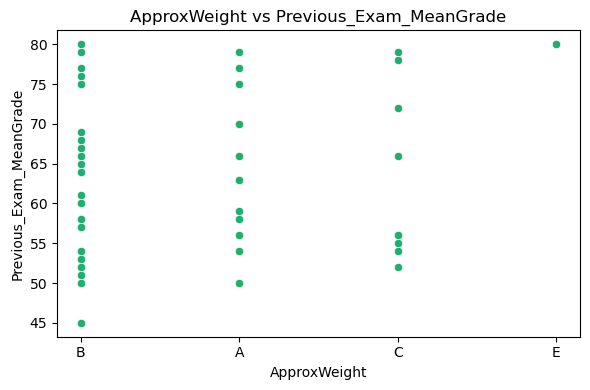

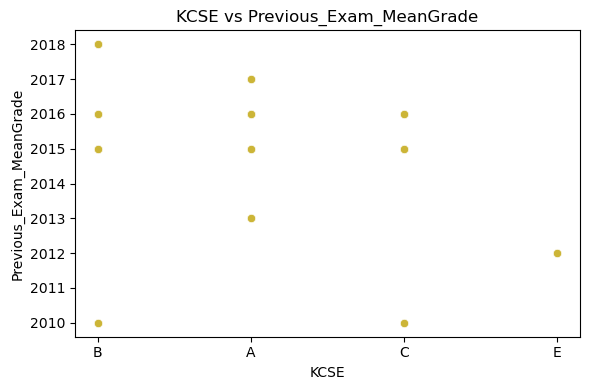

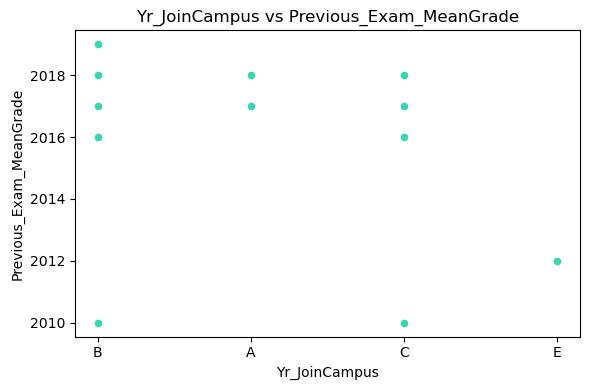

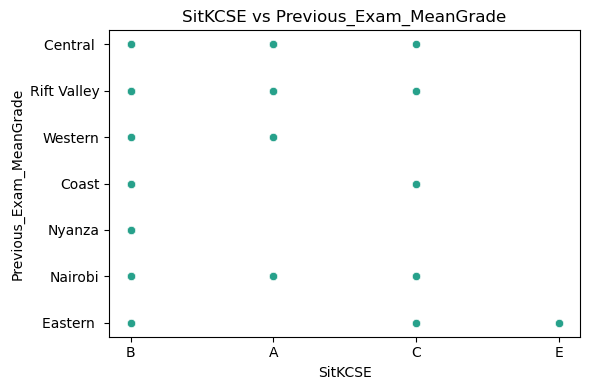

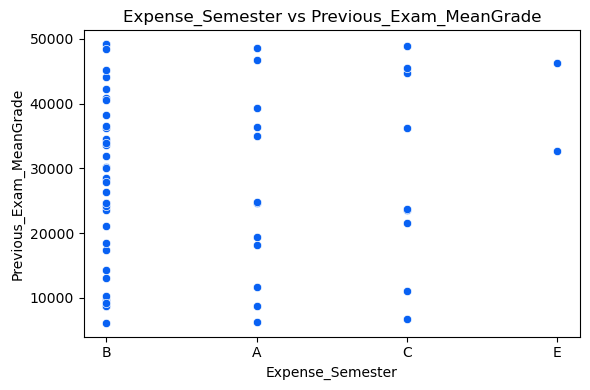

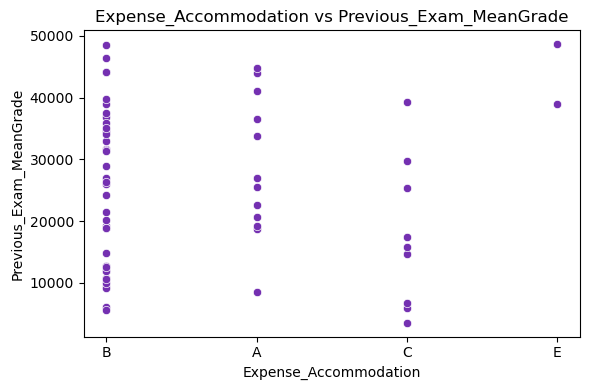

In [3]:
from sklearn.preprocessing import LabelEncoder

def random_color(): # random color for each graph
    return (random.random(), random.random(), random.random())# RGB

input_features = ['YearofStudy', 'Course', 'Age', 'ApproxHeight', 'ApproxWeight', 'KCSE',
       'Yr_JoinCampus', 'SitKCSE', 'Expense_Semester', 'Expense_Accommodation',
       ]
target = 'Previous_Exam_MeanGrade'

for feature in input_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=target, y=feature, data = df, color = random_color())
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()


Encode string labels to numbers

In [4]:


# for Previous_Exam_MeanGrade
Grade_encoder = LabelEncoder()
df['Grade_Label'] = Grade_encoder.fit_transform(df['Previous_Exam_MeanGrade'])
print(pd.unique(df['Previous_Exam_MeanGrade']))
print(pd.unique(df['Grade_Label']))

# for SitKCSE
SitKCSE_encoder = LabelEncoder()
df['SitKCSE_label'] = SitKCSE_encoder.fit_transform(df['SitKCSE'])
print(pd.unique(df['SitKCSE']))
print(pd.unique(df['SitKCSE_label']))

# for Course
Course_encoder = LabelEncoder()
df['Course_label'] = Course_encoder.fit_transform(df['Course'])
print(pd.unique(df['Course']))
print(pd.unique(df['Course_label']))

# for YearofStudy in order label
mapping = {
    'First Year': 1,
    'Second Year': 2,
    'Third Year': 3,
    'Fourth Year': 4
}
df['YearofStudy_label'] = df['YearofStudy'].map(mapping)
print(pd.unique(df['YearofStudy']))
print(pd.unique(df['YearofStudy_label']))

print(df.columns)

['B' 'A' 'C' 'E']
[1 0 2 3]
['Central ' 'Rift Valley' 'Western' 'Coast' 'Nyanza' 'Nairobi' 'Eastern ']
[0 5 6 1 4 3 2]
['MATHEMATICS' 'ECONOMICS AND STATISTICS' 'URBAN PLANNING'
 'ACTUARIAL SCIENCE' 'ECONOMICS' 'STATISTICS' 'APPLIED MATHEMATICS'
 'ELECTRICAL ENGINEERING']
[5 3 7 0 2 6 1 4]
['Second Year' 'First Year' 'Fourth Year' 'Third Year']
[2 1 4 3]
Index(['YearofStudy', 'Course', 'Age', 'ApproxHeight', 'ApproxWeight', 'KCSE',
       'Yr_JoinCampus', 'SitKCSE', 'Expense_Semester', 'Expense_Accommodation',
       'Previous_Exam_MeanGrade', 'Grade_Label', 'SitKCSE_label',
       'Course_label', 'YearofStudy_label'],
      dtype='object')


In [5]:
from sklearn.model_selection import train_test_split
# Set X and y
X = df[['YearofStudy_label', 'Course_label', 'Age', 'ApproxHeight', 'ApproxWeight', 'KCSE',
        'Yr_JoinCampus', 'SitKCSE_label', 'Expense_Semester', 'Expense_Accommodation']]

y = df['Grade_Label']  

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Model with Logistic Regression  

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# X = your feature columns
# y = your label column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline: scaling + logistic regression
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

# Evaluate the Model

In [7]:
# Print classification report with actual grade names
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
# If these are all possible encoded class values (classification_report gets confused because target_names says there are 4 classes but it only sees 3)
labels = [0, 1, 2, 3]  
print(classification_report(y_test, y_pred,labels=labels, target_names=Grade_encoder.classes_, zero_division=0))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.88      0.64      0.74        11
           C       0.33      1.00      0.50         1
           E       0.00      0.00      0.00         0

    accuracy                           0.62        13
   macro avg       0.30      0.41      0.31        13
weighted avg       0.77      0.62      0.66        13



In [8]:

inputs = {
   'YearofStudy_label': 1,
    'Course_label': 5,
    'Age': 20,
    'ApproxHeight': 167,
    'ApproxWeight': 40,
    'KCSE': 2013,
        'Yr_JoinCampus': 3,
    'SitKCSE_label': 4, 'Expense_Semester': 20000,
    'Expense_Accommodation': 30000
}
input_df = pd.DataFrame([inputs])
y_pred = model.predict(input_df)
print(y_pred)

[1]
